In [2]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import pickle
from scipy.optimize import curve_fit

In [3]:
cwd = os.getcwd()
path1 = cwd + '/plain/results_REG.txt'
path2 = cwd + '/plain/results_UNI.txt'
path3 = cwd + '/plain/results_SOB.txt'
#data = np.concatenate((np.loadtxt(path1), np.loadtxt(path2)))
dataREGplain = np.loadtxt(path1)
dataUNIplain = np.loadtxt(path2)
dataSOBplain = np.loadtxt(path3)
data_plain = np.concatenate((dataREGplain, dataUNIplain, dataSOBplain))

In [4]:
cwd = os.getcwd()
path1 = cwd + '/hole/results_REG.txt'
path2 = cwd + '/hole/results_UNI.txt'
path3 = cwd + '/hole/results_SOB.txt'
#data = np.concatenate((np.loadtxt(path1), np.loadtxt(path2)))
dataREGhole = np.loadtxt(path1)
dataUNIhole = np.loadtxt(path2)
dataSOBhole = np.loadtxt(path3)
data_hole = np.concatenate((dataREGhole, dataUNIhole, dataSOBhole))

In [5]:
data = np.concatenate((dataSOBplain, dataSOBhole))

In [6]:
# create a boolean mask based on your conditions
mask = (data[:, 6] >= 0) #& (data[:, 2] == 1) & (data[:, 1] == 6)

# use the boolean mask to select the values
avg_dist = data[mask, 3]
avg_out = data[mask, 4]
test_err = data[mask, 6]
train_err = data[mask, 5]

Slope (a): -0.005490088083114162
Intercept (b): 0.2188707120465052
2.877967585900142 1.230505905828036 0.20307041649956611


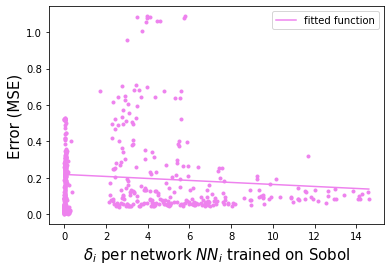

In [7]:
data = np.concatenate((dataSOBplain, dataSOBhole))

# create a boolean mask based on your conditions
mask = (data[:, 6] >= 0) #& (data[:, 2] == 1) & (data[:, 1] == 6)

# use the boolean mask to select the values
avg_dist = data[mask, 3]
avg_out = data[mask, 4]
test_err = data[mask, 6]
train_err = data[mask, 5]

# calculate polynomial
z_dist = np.polyfit(avg_out, test_err, 1)
f_dist = np.poly1d(z_dist)
a_dist = z_dist[0] # slope
b_dist = z_dist[1] # intercept

# print coefficients
print("Slope (a):", a_dist)
print("Intercept (b):", b_dist)

# calculate new x's and y's
x_dist = np.linspace(min(avg_out), max(avg_out), 100)
y_dist = f_dist(x_dist)

plt.plot(x_dist, y_dist, label="fitted function", color='violet')
plt.plot(avg_out, test_err, '.', color='violet')

plt.xlabel(r"$\delta_i$ per network $NN_i$ trained on Sobol", fontsize=15)
plt.ylabel("Error (MSE)", fontsize=15)
plt.legend()

plt.savefig("SineDeltaNetSob.png", dpi=300)

tot_out = sum(list(avg_out)) / len(list(avg_out))
tot_dist = sum(list(avg_dist)) / len(list(avg_dist))
tot_err = sum(list(test_err)) / len(list(test_err))
print(tot_out, tot_dist, tot_err)

Slope (a): -0.004622763178108843
Intercept (b): 0.22082962703057543
2.846992104970535 1.2171688672173986 0.20766865675935098


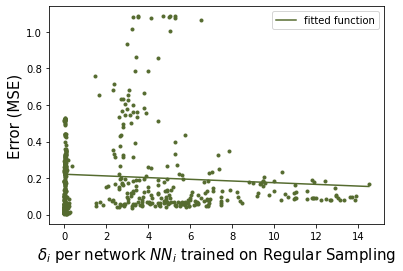

In [10]:
data = np.concatenate((dataREGplain, dataREGhole))

# create a boolean mask based on your conditions
mask = (data[:, 6] >= 0) #& (data[:, 2] == 1) & (data[:, 1] == 6)

# use the boolean mask to select the values
avg_dist = data[mask, 3]
avg_out = data[mask, 4]
test_err = data[mask, 6]
train_err = data[mask, 5]

# calculate polynomial
z_dist = np.polyfit(avg_out, test_err, 1)
f_dist = np.poly1d(z_dist)
a_dist = z_dist[0] # slope
b_dist = z_dist[1] # intercept

# print coefficients
print("Slope (a):", a_dist)
print("Intercept (b):", b_dist)

# calculate new x's and y's
x_dist = np.linspace(min(avg_out), max(avg_out), 100)
y_dist = f_dist(x_dist)

plt.plot(x_dist, y_dist, label="fitted function", color='darkolivegreen')
plt.plot(avg_out, test_err, '.', color='darkolivegreen')

plt.xlabel(r"$\delta_i$ per network $NN_i$ trained on Regular Sampling", fontsize=15)
plt.ylabel("Error (MSE)", fontsize=15)
plt.legend()

plt.savefig("SineDeltaNetReg.png", dpi=300)

tot_out = sum(list(avg_out)) / len(list(avg_out))
tot_dist = sum(list(avg_dist)) / len(list(avg_dist))
tot_err = sum(list(test_err)) / len(list(test_err))
print(tot_out, tot_dist, tot_err)

Slope (a): -0.0048146251192348445
Intercept (b): 0.2252043019360249
2.8958217502501946 1.224708701587792 0.21126200579644372


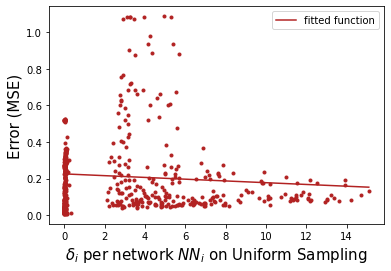

In [11]:
data = np.concatenate((dataUNIplain, dataUNIhole))

# create a boolean mask based on your conditions
mask = (data[:, 6] >= 0) #& (data[:, 2] == 1) & (data[:, 1] == 6)

# use the boolean mask to select the values
avg_dist = data[mask, 3]
avg_out = data[mask, 4]
test_err = data[mask, 6]
train_err = data[mask, 5]

# calculate polynomial
z_dist = np.polyfit(avg_out, test_err, 1)
f_dist = np.poly1d(z_dist)
a_dist = z_dist[0] # slope
b_dist = z_dist[1] # intercept

# print coefficients
print("Slope (a):", a_dist)
print("Intercept (b):", b_dist)

# calculate new x's and y's
x_dist = np.linspace(min(avg_out), max(avg_out), 100)
y_dist = f_dist(x_dist)

plt.plot(x_dist, y_dist, label="fitted function", color='firebrick')
plt.plot(avg_out, test_err, '.', color='firebrick')

plt.xlabel(r"$\delta_i$ per network $NN_i$ on Uniform Sampling", fontsize=15)
plt.ylabel("Error (MSE)", fontsize=15)
plt.legend()

plt.savefig("SineDeltaNetUni.png", dpi=300)

tot_out = sum(list(avg_out)) / len(list(avg_out))
tot_dist = sum(list(avg_dist)) / len(list(avg_dist))
tot_err = sum(list(test_err)) / len(list(test_err))
print(tot_out, tot_dist, tot_err)